
# Pandas DataReader

## What is Pandas DataReader?
Pandas DataReader is a Python package that allows us to access data sources from the internet and automatically create dataframes with the information. It is commonly used with financial data. Some common sources include:

Yahoo Finance
Google Finance
World Bank
Each source uses a slightly different format. The lesson below with demonstrate how to access data from Yahoo Finance. We will first define a start and end date. We will use Jan 1, 2001 as our start date and today's date as our end date. Note that the end date will vary depending on today's date.

In [12]:
import pandas as pd

In [1]:
import datetime as dt
##  saving today as string for pandas DataReader
today = dt.datetime.now().strftime("%Y-%m-%d")
today

'2023-03-02'

In [2]:
start_date = '2001-01-01'
end_date = today

First, we will obtain information about Microsoft stocks from Yahoo:



In [3]:
##  Pandas DataReader Import
import pandas_datareader as pdr
##  Get MSFT stock price for 2012-2020 from Yahoo Finance
msft = pdr.DataReader('MSFT','yahoo',start_date, end_date)
msft

TypeError: string indices must be integers

In [4]:
# in a notebook, use ! before a pip command 
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 115.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.7/309.7 kB 250.1 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 261.4 kB/s eta 0:00:0000:0100:01
  Created wheel for frozendict: filename=frozendict-2.3.5-cp39-cp39-macosx_11_0_arm64.whl size=12143 sha256=a050c75afc1c6deb748d4b374785a4ab3ebe61fda9a0da1ac8273456790a6c47
  Stored in directory: /Users/danielbarella/Library/Caches/pip/wheels/06/9b/23/a4a2fda5a6b1127810df66adc9ca748b2294123d30f12598f9
Successfully built frozendict
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


In [5]:
import yfinance as yfin
yfin.pdr_override()

In [6]:
import pandas_datareader.data as pdr

In [7]:
msft = pdr.get_data_yahoo('MSFT',start_date, end_date)
msft

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,22.062500,22.500000,21.437500,21.687500,13.530796,82413200
2001-01-03,21.593750,24.437500,21.562500,23.968750,14.954054,135962200
2001-01-04,23.906250,25.250000,23.437500,24.218750,15.110034,112397000
2001-01-05,24.250000,24.937500,23.781250,24.562500,15.324503,93414600
2001-01-08,24.468750,24.875000,23.343750,24.468750,15.266006,79817600
...,...,...,...,...,...,...
2023-02-23,255.559998,256.839996,250.479996,254.770004,254.770004,29219100
2023-02-24,249.960007,251.000000,248.100006,249.220001,249.220001,24990900
2023-02-27,252.460007,252.820007,249.389999,250.160004,250.160004,21190000


This issue reappeared in early January of 2023, so we will adjust the code below this point to use the new workaround function, instead of the default function.

To recap, the workaround involves:

installing an additional package.
running an override function
and then using the pandas_datareader.data.get_data_yahoo function instead of pandas_datareader.DataReader

In [8]:
# !pip install yfinance
#import yfinance as yfin
#yfin.pdr_override()
##  Pandas DataReader Import
#import pandas_datareader.data as pdr
# example use with new function
#msft = pdr.get_data_yahoo('MSFT',start_date, end_date)

Back to Our Example
Now we will extract information from Google Stocks (GOOGL).

In [9]:
##  Get GOOGL price for 2012-2020 from Yahoo Finance
googl = pdr.get_data_yahoo('GOOGL',start_date, end_date)
googl 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
...,...,...,...,...,...,...
2023-02-23,91.919998,91.940002,89.760002,90.889999,90.889999,41206400
2023-02-24,89.440002,89.889999,88.580002,89.129997,89.129997,36585100
2023-02-27,89.870003,90.160004,89.339996,89.870003,89.870003,27502300


Finally, we will obtain data on Apple stocks (AAPL):



In [10]:
##  Get AAPL stock price for 2012-2020 from Yahoo Finance
apple = pdr.get_data_yahoo('AAPL',start_date, end_date)
apple

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.226078,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.248876,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.259326,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.248876,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.251726,373699200
...,...,...,...,...,...,...
2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200
2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500


Let's make a DataFrame with the Adjusted Close for Google, Microsoft, and Apple.


In [13]:
stocks_df = pd.DataFrame({"AAPL": apple['Adj Close'],
             "MSFT": msft['Adj Close'],
             'GOOGL': googl['Adj Close']})
stocks_df

,AAPL,MSFT,GOOGL
Date,,,
2001-01-02,0.226078,13.530796,NaN
2001-01-03,0.248876,14.954054,NaN
2001-01-04,0.259326,15.110034,NaN
2001-01-05,0.248876,15.324503,NaN
2001-01-08,0.251726,15.266006,NaN
...,...,...,...
2023-02-23,149.399994,254.770004,90.889999
2023-02-24,146.710007,249.220001,89.129997
2023-02-27,147.919998,250.160004,89.870003


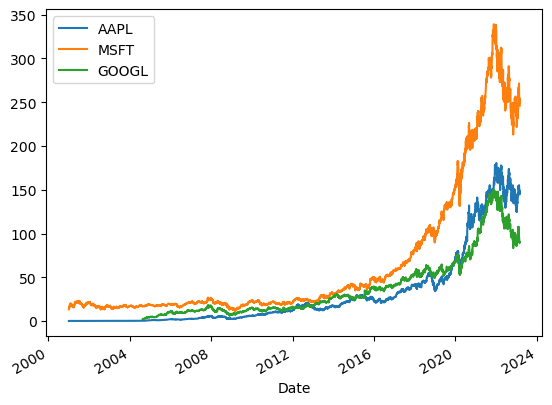

In [14]:
stocks_df.plot();

In [15]:
bitcoin= pdr.data.DataReader('BTC-USD','yahoo',start_date,end_date);
etherium =  pdr.data.DataReader('ETH-USD','yahoo',start_date,end_date);
crypto_df = pd.DataFrame({'BTC':bitcoin['Adj Close'],
                         'Eth':etherium['Adj Close']})
crypto_df

AttributeError: module 'pandas_datareader.data' has no attribute 'data'

In [16]:
crypto_df.plot();


NameError: name 'crypto_df' is not defined

## Summary
This lesson introduced you to Pandas DataReader. Specifically, we extracted stock data from Yahoo finance.